# **TikTok Project**
**EDA Analysis: Translate Data into Insights**

In this part of project, we are tasked with performing Exploratory Data Analysis (EDA) and creating data visualizations.

 The management team at TikTok has requested a Python notebook that demonstrates data structure, cleaning processes, and insightful visualizations. They specifically want to see a graph comparing claim counts to opinion counts, as well as boxplots of key variables—such as 'video duration,' 'video like count,' 'video comment count,' and 'video view count'—to identify any outliers. Additionally, a breakdown of 'author ban status' counts should be included.

The management team also expects an executive summary of the analysis to be included in the final report.

# **Exploratory data analysis**

In this activity, we will examine data provided and prepare it for analysis. We will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Our mission is to perform EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>

*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration and Data cleaning

**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?


::: {.callout-tip title="Identify any outliers:"}

***Best methods for identifying outliers:***

*1. Visual methods:*
* Box plots, Histograms, Scatter plots

*2. Statistical Methods*
* Z-score: Z-score above 3 or below -3 indicates an outlier.
* IQR methods: points lying below (Q1−1.5×IQR) or above (Q3+1.5×IQR) defines outliers

***How do you make the decision to keep or exclude outliers from any future models?***

*1. Understand the Nature of the Outliers:*

* Identify the Cause: Determine whether the outliers are due to data entry errors, measurement errors, or natural variations in the data.

*2. Assess the Impact on Your Model:*
* Model Sensitivity: Some models are more sensitive to outliers (e.g., linear regression) than others (e.g., tree-based models).
* Distribution of Data: Outliers can skew the distribution, affecting the mean and standard deviation, which are crucial for certain algorithms.Distribution of Data: Outliers can skew the distribution, affecting the mean and standard deviation, which are crucial for certain algorithms.
:::


### **Task 1. Imports, links, and loading**

Import the packages for data manipulation, visualization and other helpful function, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default figure size
plt.rcParams['figure.figsize'] = [10, 5]  # Adjust the width and height as needed

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Setup theme display
sns.set_theme(color_codes=True)

# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.3f}'.format

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("../data/tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

And find out whether missing data and outliers (if any)?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,"343,296.000","19,425.000",241.000,1.000,0.000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,"140,877.000","77,355.000","19,034.000","1,161.000",684.000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,"902,185.000","97,690.000","2,858.000",833.000,329.000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,"437,506.000","239,954.000","34,812.000","1,234.000",584.000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,"56,167.000","34,987.000","4,110.000",547.000,152.000


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

> Data has 12 variables and 19382 observations

Get basic information about the data, using `.info()`.

In [7]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 ent

>   - The data consist of 4 variables with object datatype and 8 variables with numeric datatype. It appears that there are missing values within the 19,382 observations.

Generate a table of descriptive statistics, using `.describe()`.

In [8]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In [6]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [11]:
print('Numeric columns:')
print(data.select_dtypes(include=['number']).columns)

Numeric columns:
Index(['#', 'video_id', 'video_duration_sec', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')
Numeric columns:
Index(['#', 'video_id', 'video_duration_sec', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')


In [12]:
print('Text, Catergory columns:')
print(data.select_dtypes(exclude=['number']).columns)

Text, Catergory columns:
Index(['claim_status', 'video_transcription_text', 'verified_status',
       'author_ban_status'],
      dtype='object')
Text, Catergory columns:
Index(['claim_status', 'video_transcription_text', 'verified_status',
       'author_ban_status'],
      dtype='object')


### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


> To visualize distribution of numeric variables, we can use Box plot and Histogram; and use Bar chart for Catergory variables

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

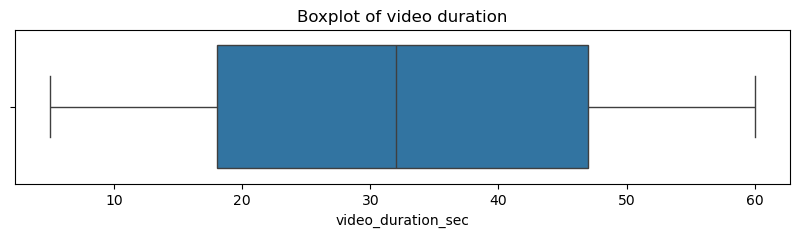

In [9]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_duration_sec'])
plt.title('Boxplot of video duration')
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

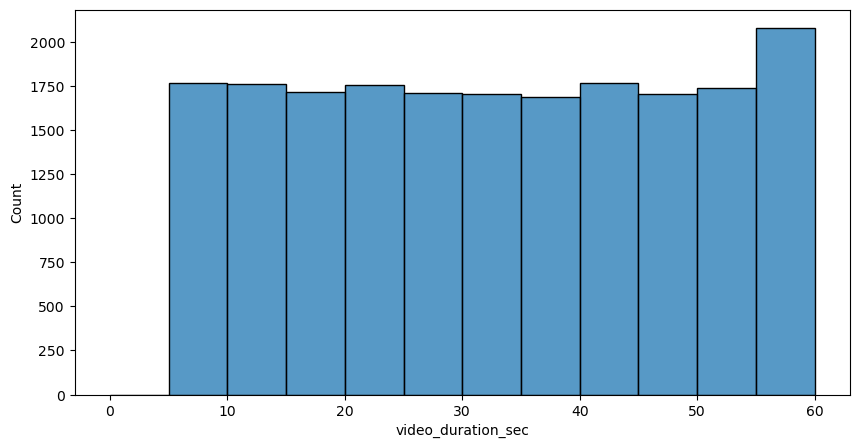

In [10]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(x=data['video_duration_sec'],bins=range(0,61,5))
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

> All videos are in lengths ranging from 5 to 60 seconds, and they ***exhibit a uniform distribution***.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

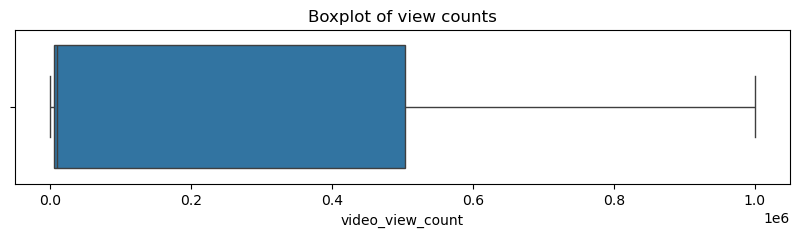

In [11]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_view_count'])
plt.title('Boxplot of view counts');

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

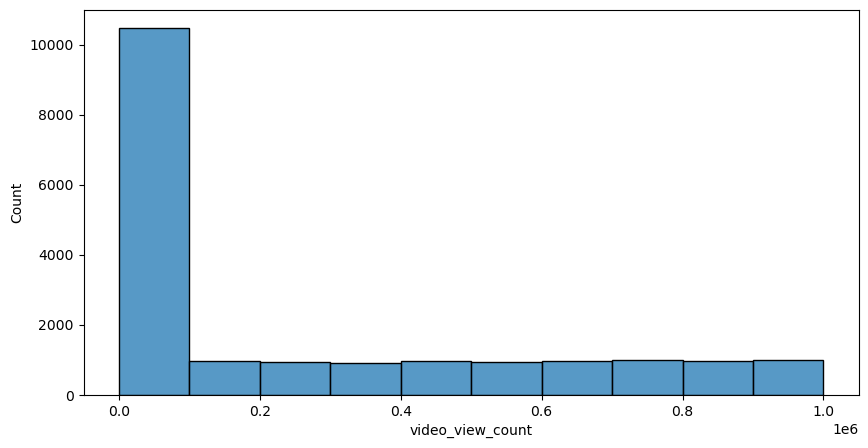

In [12]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(x=data['video_view_count'], bins=range(0,10**6+1,10**5));

**Question:** What do you notice about the distribution of this variable?
> Over 50% of the videos receive fewer than 100,000 views. The distribution of views above 100,000 shows a uniform distribution.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

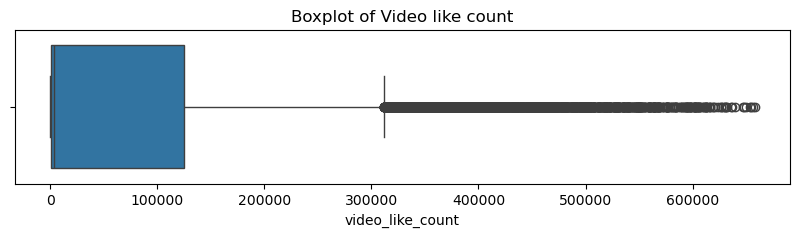

In [13]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_like_count'])
plt.title('Boxplot of Video like count');

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

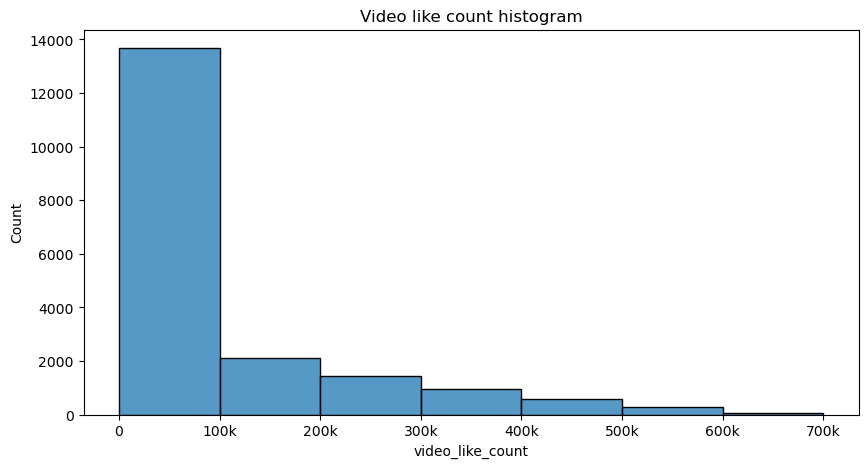

In [14]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(x=data['video_like_count'],bins=range(0,(7*10**5+1),10**5));
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
plt.xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

**Question:** What do you notice about the distribution of this variable?
> Similar to the view count, the number of videos with fewer than 100k likes is significantly higher than those with higher likes. The distribution of like counts is extremely right-skewed.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

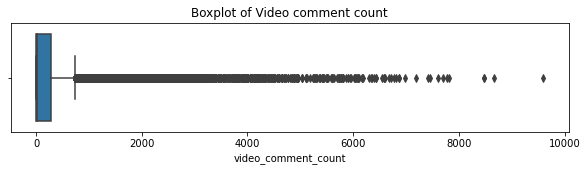

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10,2)) # change for specific chart
sns.boxplot(x=data['video_comment_count'])
plt.title('Boxplot of Video comment count');

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

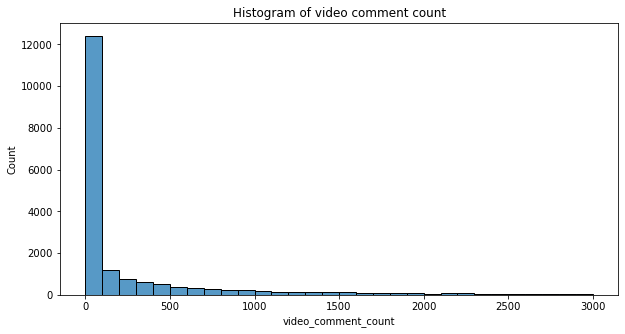

In [16]:
# Create a histogram
sns.histplot(x=data['video_comment_count'], bins=range(0,3001,100))
plt.title('Histogram of video comment count');

**Question:** What do you notice about the distribution of this variable?
> Once again, the distribution of video comment counts is extremely right-skewed, with almost every video receiving fewer than 100 comments.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

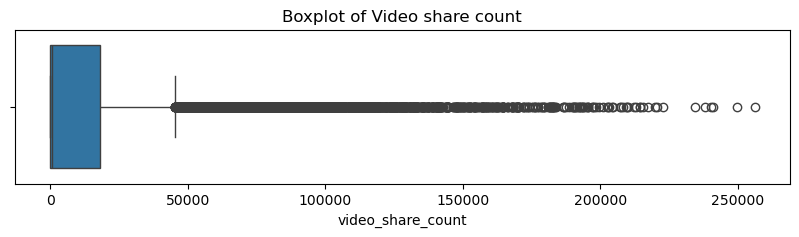

In [15]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_share_count'])
plt.title('Boxplot of Video share count');

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

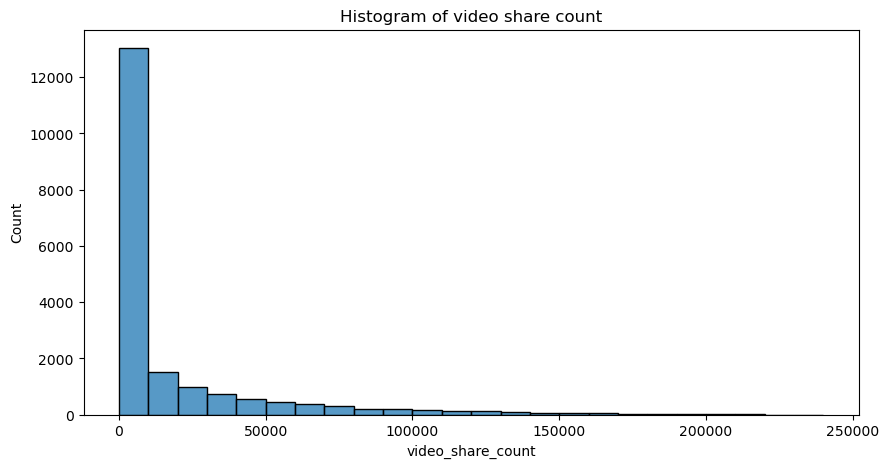

In [16]:
# Create a histogram
#plt.figure(figsize=(10,5))
sns.histplot(x=data['video_share_count'], bins=range(0,250000,10000))
plt.title('Histogram of video share count');

**Question:** What do you notice about the distribution of this variable?
> Majority video have fewer 10,000 share. Distribution is very skewed to the right.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

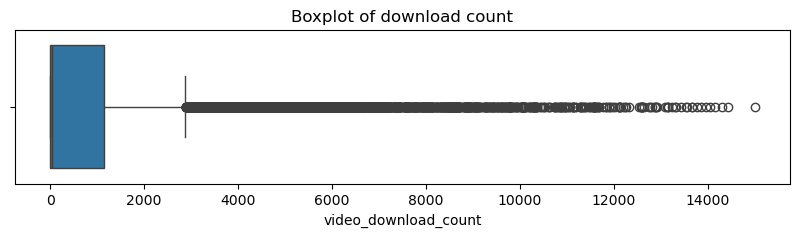

In [17]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_download_count'])
plt.title('Boxplot of download count');

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

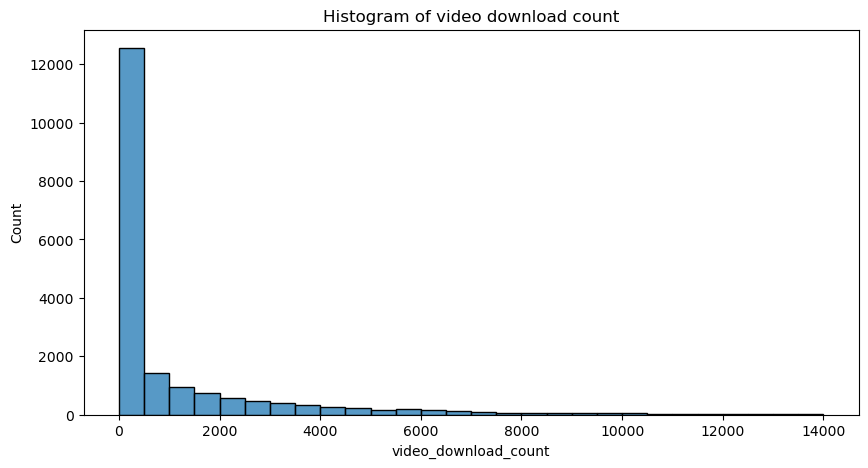

In [18]:
# Create a histogram
#plt.figure(figsize=(10,5))
sns.histplot(x=data['video_download_count'],bins=range(0,14500,500))
plt.title('Histogram of video download count');

**Question:** What do you notice about the distribution of this variable?

::: {.callout-tip title="Download count"}

The histogram shows that the distribution of the `video_download_count` variable is highly skewed to the right (positively skewed)

* **Majority of Values are Low:** The vast majority of videos have a download count close to zero. This is evident from the tall bar on the left side of the histogram.
* **Long Right Tail:** There is a long tail extending to the right, indicating that while most videos have low download counts, there are some videos with very high download counts. These higher counts are much less common.
* **Potential Outliers:** The presence of values far from the main cluster (around the right tail) suggests that there may be outliers in the data. These outliers could represent videos that have gone viral or are particularly popular.
* **Non-Normal Distribution:** The data does not follow a normal distribution. Instead, it follows a distribution typical of counts where a few observations are much larger than the rest.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

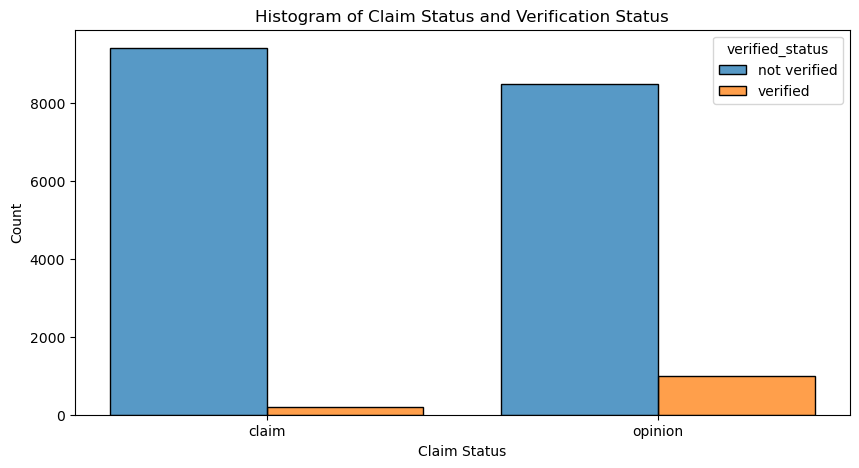

In [19]:
# Create a histogram
#plt.figure(figsize=(10, 5))

# Create a bar plot with four bars for each combination of claim_status and verification_status
sns.histplot(data=data, x='claim_status', hue='verified_status', 
             multiple='dodge', shrink=0.8)

plt.title('Histogram of Claim Status and Verification Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')

# Show the plot
plt.show()

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

> The number of unverified users is significantly higher than that of verified users. Verified users are more likely to express their opinions through posts.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

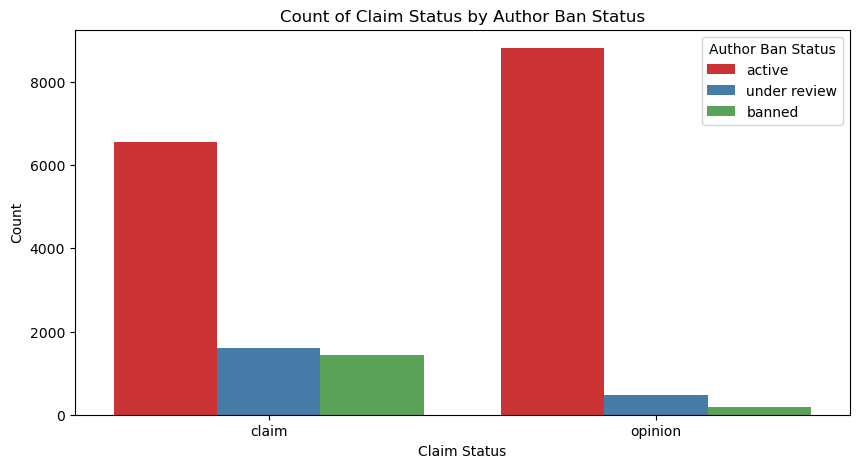

In [20]:
# Create a histogram
#plt.figure(figsize=(10, 5))

# Define the desired order of author_ban_status
status_order = ['active', 'under review', 'banned']

# Grouped bar plot for each claim status and author ban status
sns.countplot(data=data, x='claim_status', hue='author_ban_status', 
              palette='Set1',hue_order=status_order)

plt.title('Count of Claim Status by Author Ban Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.legend(title='Author Ban Status')

# Show the plot
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?
 
> - The number of active authors is significantly higher than the number of authors under review and banned, in both Claim and Opinion statuses.
> - Within the group of active authors, the number of users expressing opinions is higher than those making claims.
> - On another note, authors who post claims in videos are more likely to come under review or be banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

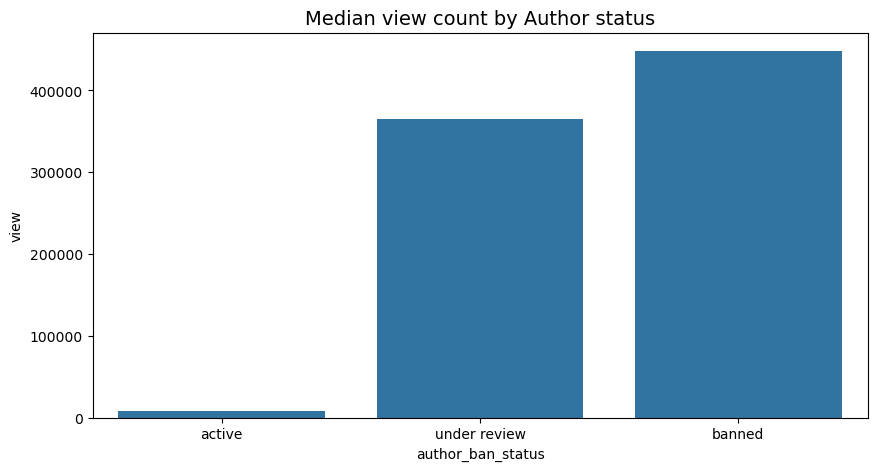

In [21]:
# Create a bar plot
df_author_ban = data.groupby('author_ban_status')['video_view_count'].median().reset_index(name='view')

# Define the desired order of author_ban_status
status_order = ['active', 'under review', 'banned']

# creat barplot
sns.barplot(data=df_author_ban,x='author_ban_status',y='view',
           order=status_order)
plt.title('Median view count by Author status',fontsize=14)
plt.show();

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?
> Suprisingly the median view counts for non-active authors are higher than those with active authors. As we known non-active authors are more likely post a claim, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of *claim status*.\
We will check the view count for claim status

In [24]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median().reset_index(name='view')

,claim_status,view
0,claim,501555.0
1,opinion,4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

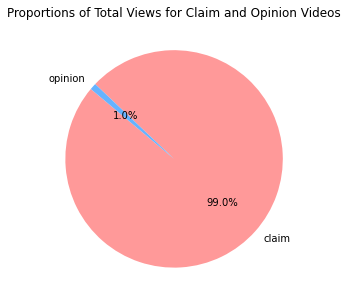

In [25]:
# Create a pie graph

df_views = data[['claim_status', 'video_view_count']]

# Group by claim_status and sum up the views
views_by_category = df_views.groupby('claim_status')['video_view_count'].sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(views_by_category, labels=views_by_category.index, autopct='%1.1f%%', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportions of Total Views for Claim and Opinion Videos')
plt.show()

**Question:** What do you notice about the overall view count for claim status?
> The majority of the video views correspond to videos with the 'claim' status.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [22]:
### This for testing ###
#Number of outliers, video_view_count:
#1. Calculate the IQR of the column
## Calculate Q1 (25th percentile)
Q1 = data['video_view_count'].quantile(0.25)
## Calculate Q3 (75th percentile)
Q3 = data['video_view_count'].quantile(0.75)\

## Calculate IQR
IQR = Q3 - Q1
print("Interquartile Range (IQR) of video_view_count:", IQR)
#2. Calculate the median of the column
median = data['video_view_count'].median()
print("Median of video_view_count:", median)

#3. Calculate the outlier threshold (median + 1.5 * IQR)
outlier_threshold = median + 1.5 * IQR
print("The outlier threshold", outlier_threshold)

#4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
# Count the number of videos with view counts exceeding the outlier threshold
outlier_count = data[data['video_view_count'] > outlier_threshold]['video_view_count'].count()
outlier_count2 = (data['video_view_count'] > outlier_threshold).sum()
outlier_data =data[data['video_view_count'] > outlier_threshold]['video_view_count']
outlier_data2=data['video_view_count'] > outlier_threshold


#5. Print "Number of outliers, {column name}: {outlier count}"
print ("Number of outliers, {column name}:", outlier_count)
print ("Number of outliers, {column name}:", outlier_count2)
outlier_data

Interquartile Range (IQR) of video_view_count: 499384.5
Median of video_view_count: 9954.5
The outlier threshold 759031.25
Number of outliers, {column name}: 2343
Number of outliers, {column name}: 2343
Interquartile Range (IQR) of video_view_count: 499384.5
Median of video_view_count: 9954.5
The outlier threshold 759031.25
Number of outliers, {column name}: 2343
Number of outliers, {column name}: 2343


2       902185.0
9       931587.0
13      929685.0
14      937231.0
16      923007.0
          ...   
9583    819274.0
9586    931007.0
9593    863413.0
9597    885151.0
9605    885521.0
Name: video_view_count, Length: 2343, dtype: float64

In [23]:
para = ['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']

for i in range(len(para)):
    Q1 = data[para[i]].quantile(0.25)
    Q3 = data[para[i]].quantile(0.75)
    IQR = Q3 - Q1
    median = data[para[i]].median()
    outlier_threshold = median + 1.5 * IQR
    outlier_count = (data[para[i]] > outlier_threshold).sum()
    print("Number of outliers for", para[i], ":", outlier_count)

Number of outliers for video_view_count : 2343
Number of outliers for video_like_count : 3468
Number of outliers for video_share_count : 3732
Number of outliers for video_download_count : 3733
Number of outliers for video_comment_count : 3882
Number of outliers for video_view_count : 2343
Number of outliers for video_like_count : 3468
Number of outliers for video_share_count : 3732
Number of outliers for video_download_count : 3733
Number of outliers for video_comment_count : 3882


#### **Scatterplot**

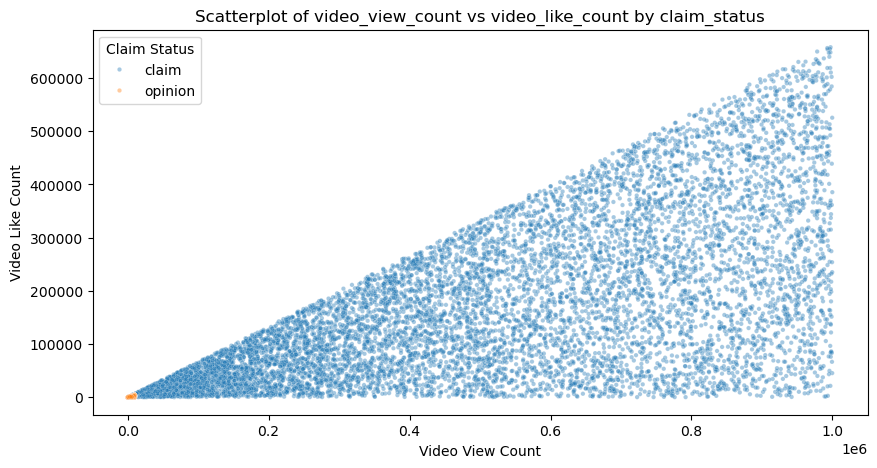

In [24]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
### YOUR CODE HERE ###
# Create a scatterplot
sns.scatterplot(x='video_view_count', y='video_like_count', 
                hue='claim_status', data=data,
                s=10,alpha=.4)

# Add labels and title
plt.title('Scatterplot of video_view_count vs video_like_count by claim_status')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')

# Show the legend
plt.legend(title='Claim Status')

# Display the plot
plt.show()

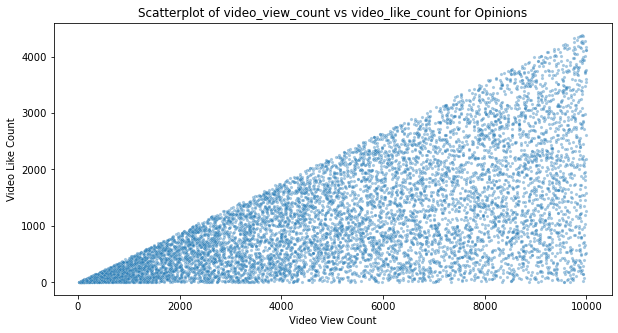

In [29]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
# Filter data for 'opinion' claim status
opinion_data = data[data['claim_status'] == 'opinion']

# Create a scatterplot for opinions only
sns.scatterplot(x='video_view_count', y='video_like_count', data=opinion_data,
               s=10,alpha=.4)

# Add labels and title
plt.title('Scatterplot of video_view_count vs video_like_count for Opinions')
plt.xlabel('Video View Count')
plt.ylabel('Video Like Count')

# Display the plot
plt.show()

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned ....
* *I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.*

My other questions are ....
* *I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.*

My client would likely want to know ...
* *My client would want to know the assumptions regarding what data might be predictive of claim_status.*

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

==> ENTER YOUR RESPONSES HERE

Visualizations helped me understand ..

==> ENTER YOUR RESPONSES HERE
